In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print(pd.__version__)
print(np.__version__)

1.1.5
1.19.5


In [ ]:
print(r"""         >      _  _  _  _            
|  _  \   (_) (_) >  >  (_) (_)  _ '    _  
| | | |__ ___   ____ __| | |\    /| |__  
| | | / __`  \   / _` \| | | \  / | |
| |/ /  |_)  |  / (_)| \ | \_____/  |
| |_/ \__,_ |  /__/._\_/ | /...../  |  
| |    | | \ \ / /  \ \  | |      | |
| |    | |  \ \ /    \ \ |_|      |_|
""")

         >      _  _  _  _            
|  _  \   (_) (_) >  >  (_) (_)  _ '    _  
| | | |__ ___   ____ __| | |\    /| |__  
| | | / __`  \   / _` \| | | \  / | |
| |/ /  |_)  |  / (_)| \ | \_____/  |
| |_/ \__,_ |  /__/._\_/ | /...../  |  
| |    | | \ \ / /  \ \  | |      | |
| |    | |  \ \ /    \ \ |_|      |_|



In [ ]:
# Eksekusi Cell ini jika ingin generate new dataset
!gdown --id 11aRsqOlcon_MwuCfs6Wtf8x4vqpeuQI8
np.random.seed(100)
def randomizeMinuman(totalRow):
    return np.random.randint(low = 1, high = 11,
                             size= totalRow)
def randomizeMakanan(totalRow):
    return np.random.randint(low = 1, high = 11,
                            size = totalRow)
def randomizePelayanan(totalRow):
    return np.random.randint(low = 1, high = 101,
                            size = totalRow)
def createDataset():
    df = pd.DataFrame({"id":range(0,100)})
    df["NilaiMinuman"] = randomizeMinuman(len(df))
    df["NilaiMakanan"] =  randomizeMakanan(len(df))
    df["NilaiPelayananan"] = randomizePelayanan(len(df))
    return df
#createDataset().to_csv("Dataset.csv",index=False)
df = pd.read_csv("Dataset.csv")

Downloading...
From: https://drive.google.com/uc?id=11aRsqOlcon_MwuCfs6Wtf8x4vqpeuQI8
To: /content/Dataset.csv
100% 1.15k/1.15k [00:00<00:00, 1.65MB/s]


In [ ]:
def fungsiTrapesium(x, a, b, c, d) :
    if (x <= a or x >= d):
        return 0
    elif (x >= a and x <= b):
        return (x - a) / (b - a)
    elif (x >= b and x <= c):
        return 1
    elif( x > c and x <= d):
        return -(x - d) / (d - c)
        
def fungsiSegitiga(x, a, b, c):
    if(x <= a or x >= c):
        return 0
    elif (x > a and x <= b):
        return (x - a) / (b - a)
    elif (x > b and x <= c):
        return -(x - c) / (c - b)

In [ ]:
# Fuzzy untuk derajat keanggotaan
class Makanan():
    def __init__(self, x):
        self.valueOfX = x
    def makananEnak(self):
        return fungsiTrapesium(self.valueOfX, 5, 8, 10, 10.001)
    def makananSedang(self):
        return fungsiSegitiga(self.valueOfX, 3, 5, 8)
    def makananNggaEnak(self):
        return fungsiTrapesium(self.valueOfX, -0.001, 0 ,3, 5)
    
class Minuman():
    def __init__(self,x):
        self.valueOfX = x
    def minumanEnak(self):
        return fungsiTrapesium(self.valueOfX, 5, 8, 10, 10.001)
    def minumanSedang(self):
        return fungsiSegitiga(self.valueOfX, 3, 5, 8)
    def minumanNggaEnak(self):
        return fungsiTrapesium(self.valueOfX, -0.001, 0 , 3, 5)

class Pelayanan():
    def __init__(self, x):
        self.valueOfX = x
    def pelayananSangatBaik(self):
        return fungsiTrapesium(self.valueOfX,  75, 90 , 100, 100.001)
    def pelayananBaik(self):
        return fungsiTrapesium(self.valueOfX, 45, 75, 80, 90)
    def pelayananBuruk(self):
        return fungsiTrapesium(self.valueOfX, 20, 45, 75, 80)
    def pelayananSangatBuruk(self):
        return fungsiTrapesium(self.valueOfX, -0.001, 0, 20 ,45 )

class Kelayakan():
    
    def __init__(self,x):
        self.valueOfX = x
    def kelayakanSangatRendah(self):
        return fungsiTrapesium(self.valueOfX, -0.001, 0, 20 ,30)
    def kelayakanRendah(self):
        return fungsiSegitiga(self.valueOfX, 20, 55, 65)
    def kelayakanTinggi(self):
        return fungsiSegitiga(self.valueOfX, 55, 75, 85)
    def kelayakanSangatTinggi(self):
        return fungsiTrapesium(self.valueOfX, 75, 100, 100.001, 100.001)

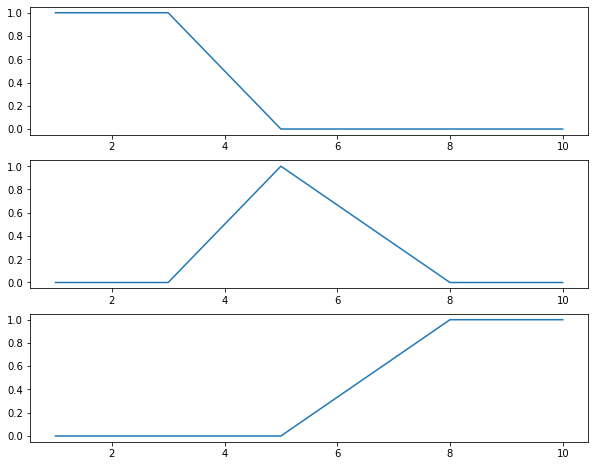

In [ ]:
# Plot ting
makanan = np.arange(1, 11,1)
f,(ax1,ax2,ax3) = plt.subplots(3,1,figsize=(10,8))
ax1.plot(makanan,[Makanan(x).makananNggaEnak() for x in makanan],label = "buruk")
ax2.plot(makanan, [Makanan(x).makananSedang() for x in makanan],label = "sedang")
ax3.plot(makanan,[Makanan(x).makananEnak() for x in makanan],label="baik")


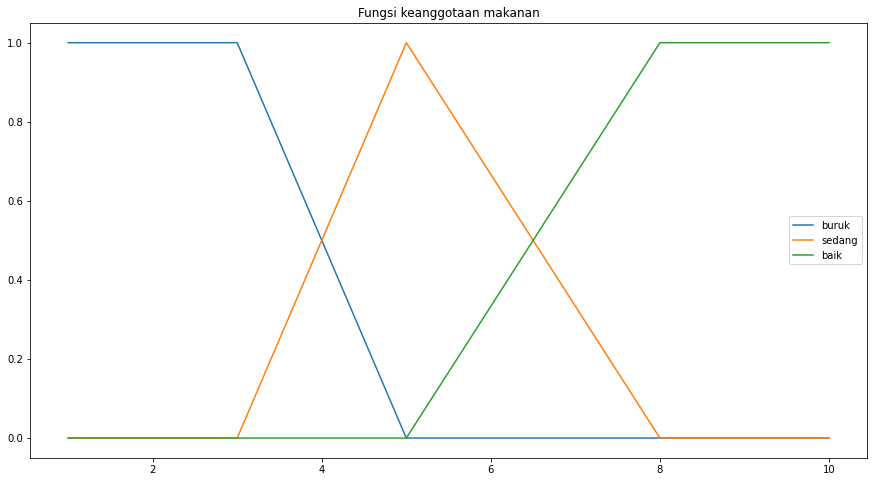

In [ ]:
makanan = np.arange(1, 11,1)
plt.figure(figsize=(15,8))
plt.plot(makanan,[Makanan(x).makananNggaEnak() for x in makanan],label = "buruk")
plt.plot(makanan, [Makanan(x).makananSedang() for x in makanan],label = "sedang")
plt.plot(makanan,[Makanan(x).makananEnak() for x in makanan],label="baik")
plt.title("Fungsi keanggotaan makanan")
plt.legend()

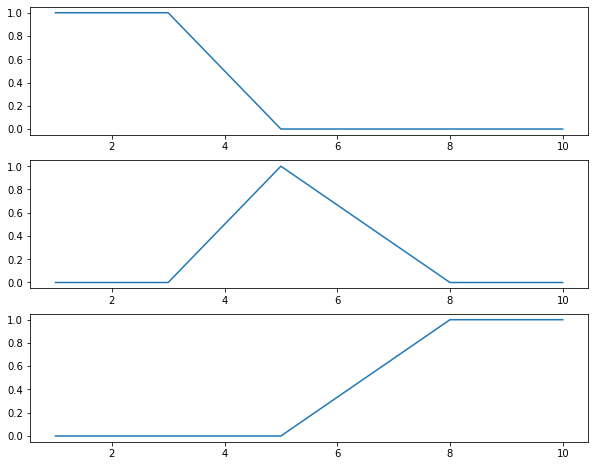

In [ ]:
# Plot Pelayanan 
minuman = np.arange(1, 11,1)
f,(ax1,ax2,ax3) = plt.subplots(3,1,figsize=(10,8))
ax1.plot(minuman,[Minuman(x).minumanNggaEnak() for x in minuman],label = "buruk")
ax2.plot(minuman, [Minuman(x).minumanSedang() for x in minuman],label = "sedang")
ax3.plot(minuman, [Minuman(x).minumanEnak() for x in minuman],label="baik")

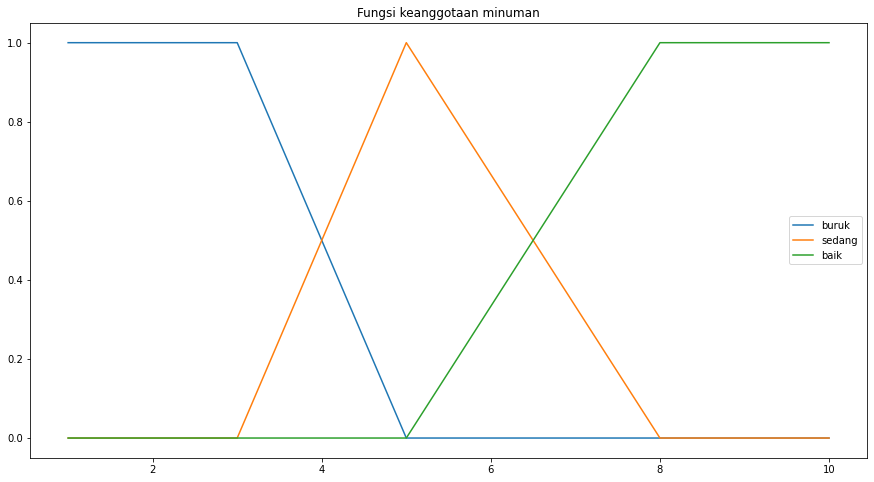

In [ ]:
minuman = np.arange(1, 11,1)
plt.figure(figsize=(15,8))
plt.plot(minuman,[Minuman(x).minumanNggaEnak() for x in minuman],label = "buruk")
plt.plot(minuman, [Minuman(x).minumanSedang() for x in minuman],label = "sedang")
plt.plot(minuman,[Minuman(x).minumanEnak() for x in minuman],label="baik")
plt.title("Fungsi keanggotaan minuman")
plt.legend()

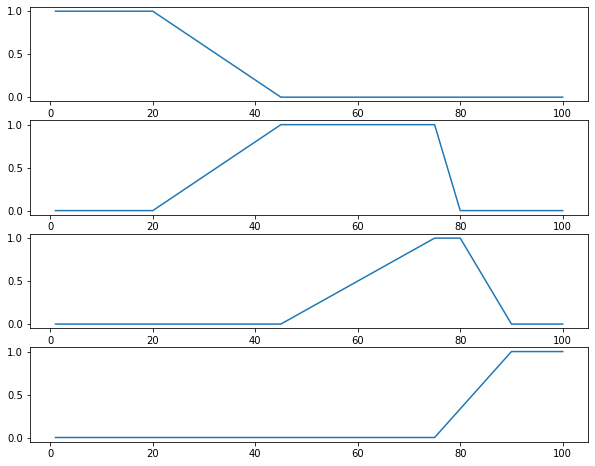

In [ ]:
#Pelayanan
pelayanan= np.arange(1, 101,1)
f,(ax1,ax2,ax3,ax4) = plt.subplots(4,1,figsize=(10,8))
ax1.plot(pelayanan,[Pelayanan(x).pelayananSangatBuruk() for x in pelayanan])
ax2.plot(pelayanan,[Pelayanan(x).pelayananBuruk() for x in pelayanan])
ax3.plot(pelayanan,[Pelayanan(x).pelayananBaik() for x in pelayanan])
ax4.plot(pelayanan,[Pelayanan(x).pelayananSangatBaik() for x in pelayanan])

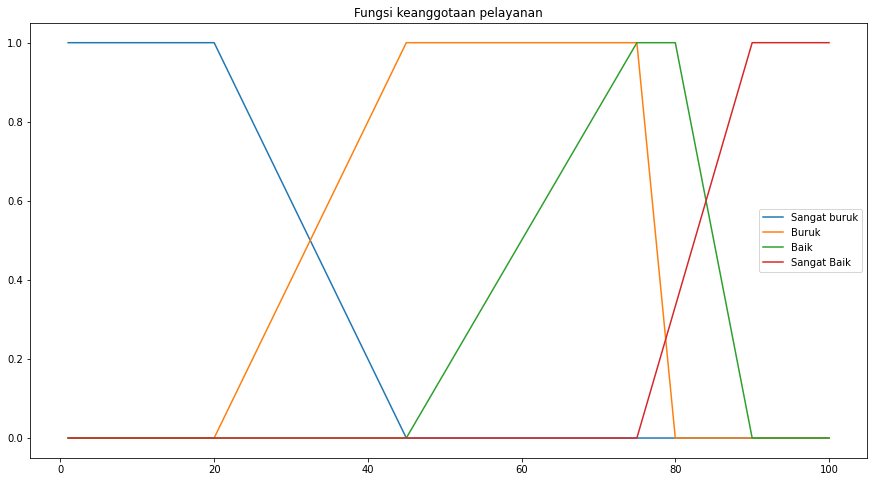

In [ ]:
plt.figure(figsize=(15,8))
pelayanan= np.arange(1, 101,1)
plt.plot(pelayanan,[Pelayanan(x).pelayananSangatBuruk() for x in pelayanan],label="Sangat buruk")
plt.plot(pelayanan,[Pelayanan(x).pelayananBuruk() for x in pelayanan],label = "Buruk")
plt.plot(pelayanan,[Pelayanan(x).pelayananBaik() for x in pelayanan],label="Baik")
plt.plot(pelayanan,[Pelayanan(x).pelayananSangatBaik() for x in pelayanan],label="Sangat Baik")
plt.title("Fungsi keanggotaan pelayanan")
plt.legend()


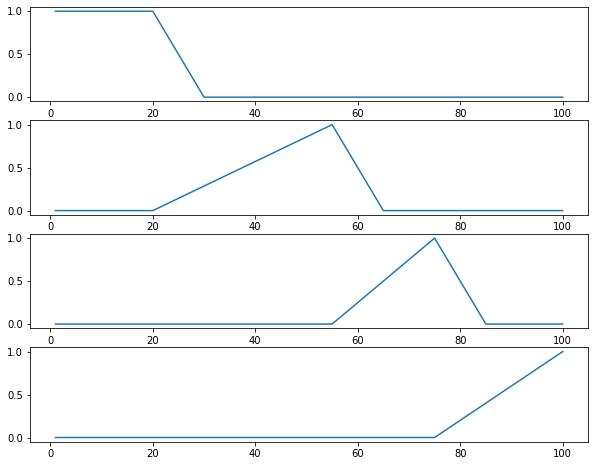

In [ ]:
kelayakan= np.arange(1, 101,1)
f,(ax1,ax2,ax3,ax4) = plt.subplots(4,1,figsize=(10,8))
ax1.plot(kelayakan,[Kelayakan(x).kelayakanSangatRendah() for x in kelayakan])
ax2.plot(kelayakan,[Kelayakan(x).kelayakanRendah() for x in kelayakan])
ax3.plot(kelayakan,[Kelayakan(x).kelayakanTinggi() for x in kelayakan])
ax4.plot(kelayakan,[Kelayakan(x).kelayakanSangatTinggi() for x in kelayakan])

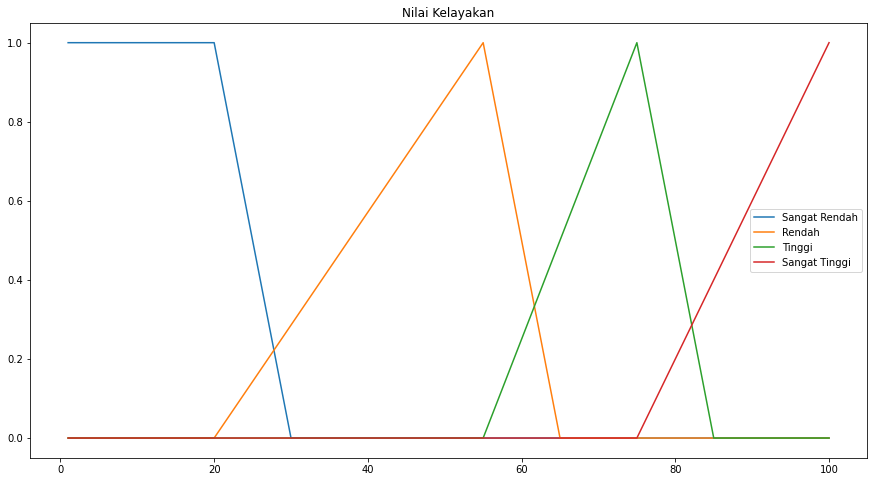

In [ ]:
kelayakan= np.arange(1, 101,1)
plt.figure(figsize=(15,8))
plt.plot(kelayakan,[Kelayakan(x).kelayakanSangatRendah() for x in kelayakan],label="Sangat Rendah")
plt.plot(kelayakan,[Kelayakan(x).kelayakanRendah() for x in kelayakan],label="Rendah")
plt.plot(kelayakan,[Kelayakan(x).kelayakanTinggi() for x in kelayakan],label="Tinggi")
plt.plot(kelayakan,[Kelayakan(x).kelayakanSangatTinggi() for x in kelayakan],label="Sangat Tinggi")
plt.title("Nilai Kelayakan")
plt.legend()

In [ ]:
nilaiMakanan = 4.5
MakananObj = Makanan(nilaiMakanan)
ArrPenilainFuzzy = [MakananObj.makananNggaEnak(),MakananObj.makananSedang(),MakananObj.makananEnak()]
ArrPenilainFuzzy

[0.25, 0.75, 0]

In [ ]:
# 0 representasikan buruk pada makanan dan minuman, sangat buruk untuk pelayanan, sangat rendah untuk NK
# 1 representasikan sedang pada makanan dan minuman, buruk untuk pelayanan, rendah untuk NK
# 2 representasikan baik pada makanan dan minuman, baik untuk pelayanan, tinggi untuk NK
# 3 representasikan sangat baik pada pelayanan, sangat tinggi untuk NK

def RulesNgab(makanan, minuman, pelayanan):
    if (makanan == 0 and minuman == 0 and pelayanan == 0):
        return 0
    
    elif (makanan == 0 and minuman == 0 and pelayanan == 1):
        return 0
    
    elif(makanan == 0 and minuman  == 0 and pelayanan == 2 ):
        return 1
    
    elif(makanan == 0 and minuman == 0 and pelayanan == 3):
        return 1
    
    elif(makanan == 1 and minuman == 0 and pelayanan == 0):
        return 0
    
    elif(makanan == 1 and minuman == 0 and pelayanan == 1):
        return 0
   
    elif(makanan == 1 and minuman == 0 and pelayanan == 2):
        return 0
    
    elif(makanan == 1 and minuman == 0 and pelayanan == 3):
        return 1
    
    #baik / buruk
    elif(makanan == 2 and minuman == 0 and pelayanan == 0):
        return 0
    elif(makanan == 2 and minuman == 0 and pelayanan == 1):
        return 1
    elif(makanan == 2 and minuman == 0 and pelayanan == 2):
        return 1
    elif(makanan == 2 and minuman == 0 and pelayanan == 3):
        return 2
    
    # buruk/ baik
    elif(makanan == 0 and minuman ==2 and pelayanan == 0):
        return 0
    elif(makanan == 0 and minuman ==2 and pelayanan == 1):
        return 1
    elif(makanan == 0 and minuman ==2 and pelayanan == 2):
        return 1
    elif(makanan == 0 and minuman ==2 and pelayanan == 3):
        return 2
    
    
    #Buruk/sedang
    elif(makanan == 0 and minuman == 1 and pelayanan == 0):
        return 0
    elif(makanan == 0 and minuman == 1 and pelayanan == 1):
        return 0
    elif(makanan == 0 and minuman == 1 and pelayanan == 2):
        return 0
    elif(makanan == 0 and minuman == 1 and pelayanan == 3):
        return 1
    
    #Sedang / Sedang
    elif (makanan == 1 and minuman == 1 and pelayanan == 0):
        return 1
    elif (makanan == 1 and minuman == 1 and pelayanan == 1):
        return 1
    elif (makanan == 1 and minuman == 1 and pelayanan == 2):
        return 2
    elif (makanan == 1 and minuman == 1 and pelayanan == 3):
        return 2
    #Sedang / Baik 
    elif(makanan == 1 and minuman == 2 and pelayanan == 0):
        return 1
    elif(makanan == 1 and minuman == 2 and pelayanan == 1):
        return 1
    elif(makanan == 1 and minuman == 2 and pelayanan == 2):
        return 2
    elif(makanan == 1 and minuman == 2 and pelayanan == 3):
        return 3
    
    #Baik / Sedang
    elif(makanan == 2 and minuman == 1 and pelayanan == 0):
        return 1
    elif(makanan == 2 and minuman == 1 and pelayanan == 1):
        return 1
    elif(makanan == 2 and minuman == 1 and pelayanan == 2):
        return 2
    elif(makanan == 2 and minuman == 1 and pelayanan == 3):
        return 3
    
    #baik / baik
    elif(makanan == 2 and minuman == 2 and pelayanan == 0):
        return 1
    elif(makanan == 2 and minuman == 2 and pelayanan == 1):
        return 2
    elif(makanan == 2 and minuman == 2 and pelayanan == 2):
        return 3
    elif(makanan == 2 and minuman == 2 and pelayanan == 3):
        return 3

In [ ]:
def mapMakanan(x):
    if (x == 0):
        return "buruk"
    elif (x==1):
        return "sedang"
    elif (x==2):
        return "baik"

def mapPelayanan(x):
    if (x == 0):
        return "buruk"
    elif (x == 1):
        return "cukup"
    elif (x == 2):
        return "baik "
    elif (x == 3):
        return "sangat baik"
    
def mapMinuman(x):
    if (x == 0):
        return "buruk"
    elif (x == 1):
        return "sedang"
    elif (x == 2):
        return "baik"
    
    
def mapKualitas(x):
    if (x == 0):
        return "sangat rendah"
    elif (x == 1):
        return "rendah"
    elif (x == 2):
        return "tinggi"
    elif (x == 3):
        return "sangat tinggi"

In [ ]:
nilaiMakanan = 4.5
MakananObj = Makanan(nilaiMakanan)
ArrPenilainFuzzy = [MakananObj.makananNggaEnak(),MakananObj.makananSedang(),MakananObj.makananEnak()]
ArrPenilainFuzzy
    

[0.25, 0.75, 0]

In [ ]:
def fuzzyLogic(makananScore , minumanScore , pelayananScore):
    
    MakananObj = Makanan(makananScore)
    MinumanObj = Minuman(minumanScore)
    PelayananObj = Pelayanan(pelayananScore)
    
    makananArr = np.array([round(m,2) for m in [MakananObj.makananNggaEnak(),MakananObj.makananSedang(),
                            MakananObj.makananEnak()]])
    minumanArr = np.array([round(m,2) for m in [MinumanObj.minumanNggaEnak(),MinumanObj.minumanSedang(),
                  MinumanObj.minumanEnak()]])
    pelayananArr = np.array([round(p,2) for p in [PelayananObj.pelayananSangatBuruk(),PelayananObj.pelayananBuruk(),
                   PelayananObj.pelayananBaik(),PelayananObj.pelayananSangatBaik()]])

    hasilInference = inference(makananArr,minumanArr,pelayananArr)
    print("Hasil Inference : ")
    for i in range(len(hasilInference)):
        print(f"Nilai Kelayakan : {mapKualitas(i)} -> {hasilInference[i]}")
    
    return defuzzySugeno(*hasilInference)
def defuzzySugeno(sgtRendah, rendah, tinggi, sgtTinggi):
    totalValue = 0
    pembagi = 0
    
    if (sgtRendah != 0):
        totalValue += sgtRendah * 20
        pembagi += sgtRendah
    if (rendah != 0):
        totalValue += rendah * 55
        pembagi += rendah 
    if (tinggi != 0):
        totalValue += tinggi * 70
        pembagi += tinggi
    if(sgtTinggi != 0):
        totalValue += sgtTinggi * 100
        pembagi += sgtTinggi
    
    return totalValue / pembagi
    
def gradeResult(idxMakanan, idxMinuman, idxPelayanan,
                makananArrScore,minumanArrScore,pelayananArrScore):
    val = np.zeros(shape=(4),dtype=np.float) 
    for i in idxPelayanan:
        for j in idxMakanan:
            for z in idxMinuman:
                
                print(f"Makanan : {mapMakanan(j)} -> {makananArrScore[j]} \nMinuman : {mapMinuman(z)} -> {minumanArrScore[z]} \nPelayanan  : {mapPelayanan(i)} -> {pelayananArrScore[i] }")
                print(f"Nilai Kualitas : {mapKualitas(RulesNgab(j,z,i))} {(min(makananArrScore[j],minumanArrScore[z],pelayananArrScore[i]))}\n")
                print(min(makananArrScore[j],minumanArrScore[z],pelayananArrScore[i]))
                if val[RulesNgab(j,z,i)] < min(makananArrScore[j],minumanArrScore[z],pelayananArrScore[i]):
                    val[RulesNgab(j,z,i)] = min(makananArrScore[j],minumanArrScore[z],pelayananArrScore[i])
    return val   
def inference(makananArrScore,minumanArrScore,pelayananArrScore):
    result = np.zeros(shape=(5),dtype=np.float)

    zerosMinuman = np.where(minumanArrScore == 0)[0] # Get The content ,i.e Index zeros Minuman
    zerosMakanan = np.where(makananArrScore == 0)[0]
    zerosPelayanan = np.where(pelayananArrScore == 0)[0]
    
    if(np.size(zerosPelayanan) <= 2):
        idxPelayanan = (-pelayananArrScore).argsort()
        
        if (np.size(zerosMakanan) <= 1):
            idxMakanan = (-makananArrScore).argsort()[:2]
            
            if(np.size(zerosMinuman) <= 1):
                idxMinuman = (-minumanArrScore).argsort()[:2]
                result = gradeResult(idxMakanan, idxMinuman, idxPelayanan,makananArrScore,
                                     minumanArrScore,pelayananArrScore)
                
            
            elif(np.size(zerosMinuman) > 1):
                idxMinuman = (-minumanArrScore).argsort()[:1]
                result = gradeResult(idxMakanan, idxMinuman,
                                     idxPelayanan,makananArrScore,
                                     minumanArrScore,pelayananArrScore)
                       
        elif (np.size(zerosMakanan) > 1 ):
            idxMakanan = (-makananArrScore).argsort()[:1]
            
            
            if(np.size(zerosMinuman) <= 1):
                idxMinuman = (-minumanArrScore).argsort()[:2]
                result = gradeResult(idxMakanan, idxMinuman, idxPelayanan,makananArrScore,
                                     minumanArrScore,pelayananArrScore)
                
            
            elif(np.size(zerosMinuman) > 1):
                idxMinuman = (-minumanArrScore).argsort()[:1]
                result = gradeResult(idxMakanan, idxMinuman,
                                     idxPelayanan,makananArrScore,
                                     minumanArrScore,pelayananArrScore)           
 
        
    elif(np.size(zerosPelayanan) >2):
        idxPelayanan = (-pelayananArrScore).argsort()[:1]
    
        if (np.size(zerosMakanan) <= 1):
            idxMakanan = (-makananArrScore).argsort()[:2]
            
            if(np.size(zerosMinuman) <= 1):
                idxMinuman = (-minumanArrScore).argsort()[:2]
                result = gradeResult(idxMakanan, idxMinuman, idxPelayanan,makananArrScore,
                                     minumanArrScore,pelayananArrScore)
                
            
            elif(np.size(zerosMinuman) > 1):
                idxMinuman = (-minumanArrScore).argsort()[:1]
                result = gradeResult(idxMakanan, idxMinuman,
                                     idxPelayanan,makananArrScore,
                                     minumanArrScore,pelayananArrScore)
                
                
        elif (np.size(zerosMakanan) > 1 ):
            idxMakanan = (-makananArrScore).argsort()[:1]
            
            
            if(np.size(zerosMinuman) <= 1):
                idxMinuman = (-minumanArrScore).argsort()[:2]
                result = gradeResult(idxMakanan, idxMinuman, idxPelayanan,makananArrScore,
                                     minumanArrScore,pelayananArrScore)
                
            
            elif(np.size(zerosMinuman) > 1):
                idxMinuman = (-minumanArrScore).argsort()[:1]
                result = gradeResult(idxMakanan, idxMinuman,
                                     idxPelayanan,makananArrScore,
                                     minumanArrScore,pelayananArrScore)           
 
    return result

In [ ]:
df

,id,NilaiMinuman,NilaiMakanan,NilaiPelayananan
0,0,9,7,10
1,1,9,5,50
2,2,4,8,54
3,3,8,4,35
4,4,8,10,4
5,5,1,3,12
6,6,5,4,50
7,7,3,9,30
8,8,6,8,37
9,9,3,2,94


In [ ]:
df["nilaiKelayakan"] = 0
for i in df.itertuples():
    df.loc[i[0],"nilaiKelayakan"] = fuzzyLogic(i[3],i[2],i[4])
df

Makanan : baik -> 0.67 
Minuman : baik -> 1 
Pelayanan  : buruk -> 1
Nilai Kualitas : rendah 0.67

0.67
Makanan : sedang -> 0.33 
Minuman : baik -> 1 
Pelayanan  : buruk -> 1
Nilai Kualitas : rendah 0.33

0.33
Hasil Inference : 
Nilai Kelayakan : sangat rendah -> 0.0
Nilai Kelayakan : rendah -> 0.67
Nilai Kelayakan : tinggi -> 0.0
Nilai Kelayakan : sangat tinggi -> 0.0
Makanan : sedang -> 1.0 
Minuman : baik -> 1 
Pelayanan  : cukup -> 1.0
Nilai Kualitas : rendah 1.0

1.0
Makanan : sedang -> 1.0 
Minuman : baik -> 1 
Pelayanan  : baik  -> 0.17
Nilai Kualitas : tinggi 0.17

0.17
Makanan : sedang -> 1.0 
Minuman : baik -> 1 
Pelayanan  : buruk -> 0.0
Nilai Kualitas : rendah 0.0

0.0
Makanan : sedang -> 1.0 
Minuman : baik -> 1 
Pelayanan  : sangat baik -> 0.0
Nilai Kualitas : sangat tinggi 0.0

0.0
Hasil Inference : 
Nilai Kelayakan : sangat rendah -> 0.0
Nilai Kelayakan : rendah -> 1.0
Nilai Kelayakan : tinggi -> 0.17
Nilai Kelayakan : sangat tinggi -> 0.0
Makanan : baik -> 1.0 
Minuman

,id,NilaiMinuman,NilaiMakanan,NilaiPelayananan,nilaiKelayakan
0,0,9,7,10,55.000000
1,1,9,5,50,57.179487
2,2,4,8,54,60.625000
3,3,8,4,35,39.444444
4,4,8,10,4,55.000000
5,5,1,3,12,20.000000
6,6,5,4,50,42.222222
7,7,3,9,30,34.000000
8,8,6,8,37,59.950000
9,9,3,2,94,55.000000


In [ ]:
pd.set_option("max_rows",None)
df.sort_values(by=["nilaiKelayakan"],ascending=False)

,id,NilaiMinuman,NilaiMakanan,NilaiPelayananan,nilaiKelayakan
50,50,9,8,88,100.000000
27,27,8,10,83,100.000000
17,17,10,5,93,100.000000
67,67,10,8,80,100.000000
55,55,9,6,88,93.103448
65,65,7,5,88,90.100000
42,42,8,9,77,88.750000
46,46,9,8,66,82.352941
14,14,9,7,74,79.071856
18,18,7,9,69,79.071856


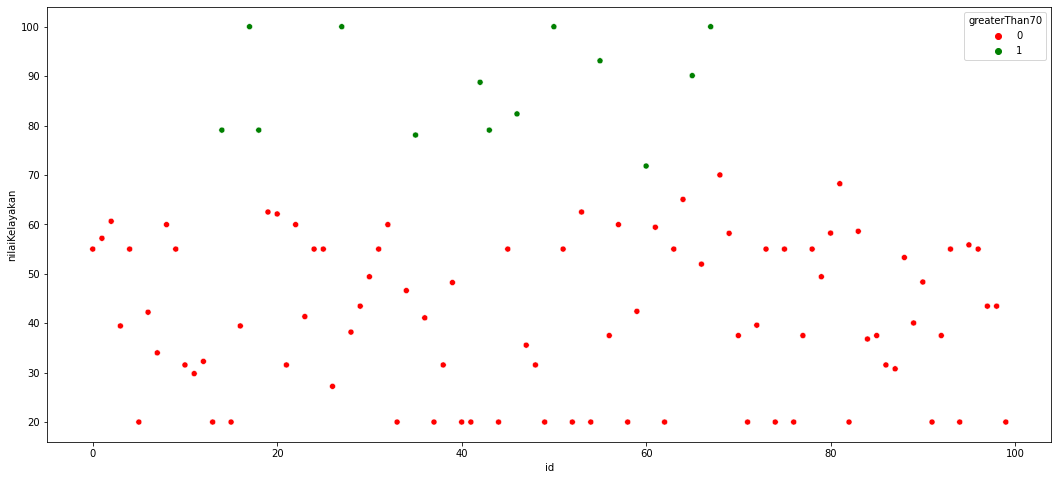

In [ ]:
plt.figure(figsize=(18,8))
df["greaterThan70"] = np.where(df["nilaiKelayakan"] > 70,1,0)
sns.scatterplot( x = df["id"],y = df["nilaiKelayakan"],hue=df["greaterThan70"],palette = ['red',"green"])